In [2]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [3]:
# Step 2: Load dataset
data = pd.read_csv('creditcard_cleaned.csv')
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,185.375,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990,0.0


In [4]:
# Step 3: Prepare features
X = data.drop('Class', axis=1)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
# Check for missing values
print("Missing values before cleaning:")
print(X.isnull().sum().sum())


Missing values before cleaning:
4


In [7]:
# Step 3.5: Handle Missing Values
# Fill missing values with column mean (numerical columns only)
X = X.fillna(X.mean())

# Now scale again after fixing NaNs
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:
# Step 4: Apply K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to data
data['Cluster'] = kmeans.labels_

# Display sample
data[['Cluster', 'Class']].head()


,Cluster,Class
0,1,0.0
1,1,0.0
2,1,0.0
3,1,0.0
4,1,0.0


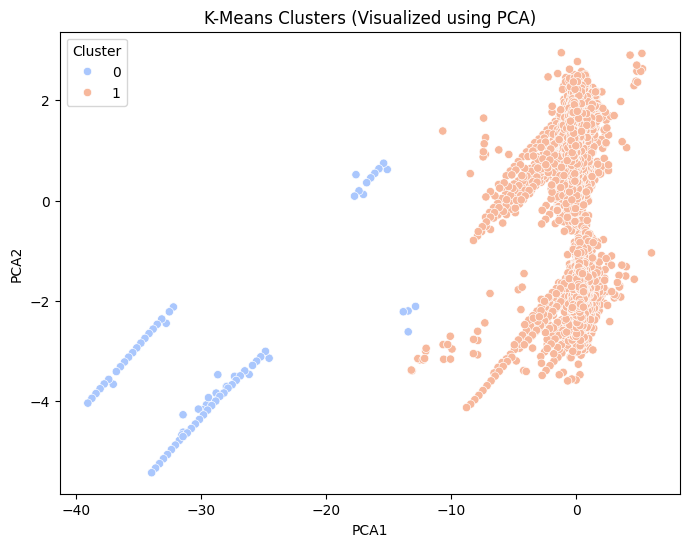

In [9]:
# Step 5: Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

# Visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='coolwarm')
plt.title('K-Means Clusters (Visualized using PCA)')
plt.show()


In [10]:
# Step 6: Compare Clusters with Actual Labels
cross_tab = pd.crosstab(data['Cluster'], data['Class'])
print("Cluster vs Actual Class:")
print(cross_tab)


Cluster vs Actual Class:
Class      0.0  1.0
Cluster            
0           32   48
1        27692   45
